In [1]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

In [2]:
# to load images for this tutorial
from IPython.display import Image
import os
path = os.getcwd()

# Math libraries
import numpy as np

# Data visualization module
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)
import pandas as pd
import seaborn as sns

# SVM module
from sklearn.svm import SVC

<div style="font-size:16px; border:1px solid black; padding:10px">
<center><h1><br><font color="blue">Post Overview.</font></h1></center>
    <ol>
        <li><a href="#objective1">Introduction to SVM and Soft Margin Classification.</a></li><br>
        <li><a href="#objective2">Methods Overview.</a></li><br>
        <li><a href="#objective3">Demonstrate how to carry out SVM Hard Margin Classification.</a></li><br>   
        <li><a href="#objective4">Demonstrate how to carry out SVM Hard Margin Classification with Feature Scaling.</a></li><br>
        <li><a href="#objective5">Demonstrate how to carry out SVM Soft Margin Classification.</a></li><br>
        <li><a href="#objective6">Demonstrate how the Regularization Term <code>C</code> affects the Margin Size in SVM Soft Margin Classification.</a></li><br>
    </ol>
</div>

<hr style="border-top: 5px solid black;">

<div id="objective1" style="font-size:16px; border:1px solid black; padding:10px">
<center><h1><br><font color="blue">Introduction to Linear Support Vector Machines (SVM)</font></h1></center>
    <hr>
    <ul><h4></h4>
        <li>Support Vector Machine algorithm is a powerful supervised Machine Learning Models capable of performing
            <ul>
        <li>Linear classification</li>
        <li>Nonlinear classification</li>
        <li>Regression</li>
        <li>Outlier detection</li>
            </ul>
        </li><br>
        <li>Linear classification can also be further defined as either <strong><em>Hard or Soft Margin classification</em></strong>.</li><br>  
        <li>This post will focus on Linear SVM Classification.</li><br>        
        <li>SVM is one of the most popular machine learning models and is well suited for classification of complex datasets that are small and medium sized.</li><br>
        <li>Like logistic regression, support vector machines were designed for binary classification and do not natively support classification tasks with more than two classes.</li><br>
        <li>There is a way to carry out multi-classification problems using binary classification algorithms, but that requires the data be split into multiple binary classification datasets and then fit to a binary classification model.</li><br>
        <li>In this algorithm, data is plotted in n-dimensional space (where n is number of features you have). Then, we perform classification by finding a decision boundary (aka hyperplane in 3d+) that best differentiates the two classes.</li><br>
        <li>SVM is popular because it also uses Kernel function to help solve nonlinearity that help create decision boundaries.</li><br>
        <li>Decision boundaries are used in SVM to help sort data into categories for classification.</li><br>
        <li><mark style="background-color: yellow;">The objective of the support vector machine algorithm is to find a hyperplane in an N-dimensional space(N — the number of features) that distinctly classifies the data points. <a href="#image6">Image 6</a></mark></li>
    </ul>
    <hr>
<center><h1><font color="blue">The Goal of this post is to demonstrate how to carry out a linear SVM using Python Sklearn.</font></h1></center>
</div>

<hr style="border-top: 5px solid black;">

<div id="objective2" style="font-size:16px; border:1px solid black; padding:10px">
<center><h1><br><font color="blue">Methods Overview.</font></h1></center>
    <ol>
        <li><a href="#objective2a">Step 2a:</a> Data was obtained from <a href="https://sportsdata.io/">SportDataIO</a> and loaded into Pandas dataframe. A guide to making an API call to SportDataIO can be obtained in <a href="https://trinidadcisneros.com/folders/python/python_sportsdataio_api.html">A quick and easy guide to make a SportsDataIO API call and load data to Pandas.</a> post.  Two data sources were used in this project. The second dataset contained the position abbreviation, and the name of the position.</li><br>
        <li><a href="#objective2a">Step 2b:</a> The dataframes were merged so that the sportsdata contained the full name of the position. This was missing in the api response.</li><br> 
        <li><a href="#objective2a">Step 2c:</a> The features were selected based on the mean weight and height values, and how well they would perform in this SVM classification.</li><br>
        <li><a href="#objective2a">Step 2d:</a> As an option, the new dataframe can be saved as a csv file.</li><br>
        <li><a href="#objective2b">Step 2e:</a> The data was visualized before a Linear SVM is applied to the data.</li><br>
    </ol>
</div>

<div style="font-size:16px; border:1px solid black; padding:10px">
<center><h2><br><font color="blue">Load Data Prepare Data for SVM</font></h2></center>
    <ol>
        <li id="objective2a">Two data files were loaded using <code>Pandas</code>.</li><br>
        <li>Dataframes were merged and features transformed.</li><br> 
    </ol>
</div>

In [3]:
# Files
nfl_file = 'static/data/nfl_df.csv'
nfl_abbreviation_file = 'static/data/nfl_abbr.csv'

# Import into pandas dataframe
nfl_df = pd.read_csv(nfl_file)
nfl_abbr = pd.read_csv(nfl_abbreviation_file)

# Merge dataframes
merged_df = nfl_df.merge(nfl_abbr, on ='Position')

# Rearrange columns
merged_df = merged_df[['PlayerID', 'ShortName', 'Team', 'Position', 'Position Title', 'Height_in', 'Weight_lbs', 'PhotoUrl']]

# Dataframe 1 (Offensive Lineman and Cornerback)
group=['Offensive Lineman', 'Outside Linebacker']
df = merged_df.loc[merged_df['Position Title'].isin(group)].reset_index(drop=True)
df["target"] = np.where(df['Position Title'] == 'Offensive Lineman', 1, 0)  # add target column

# Save new file
# df.to_csv('static/data/group_df1.csv', index=False)

<div id="objective2b" style="font-size:16px; border:1px solid black; padding:10px">
<center><h2><br><font color="blue">Data Visualization Step.</font></h2></center>
    <ol><strong>Goal:</strong> Demonstrate that an infinite number of lines can be drawn to separate our groups.
        <li>Use matplotlib and seaborn to generate a scatter plot of our two features, and group the players by position type.</li><br>
        <li>Plot three decision boundaries (as lines) to separate the two groups.</li><br> 
    </ol>
</div>

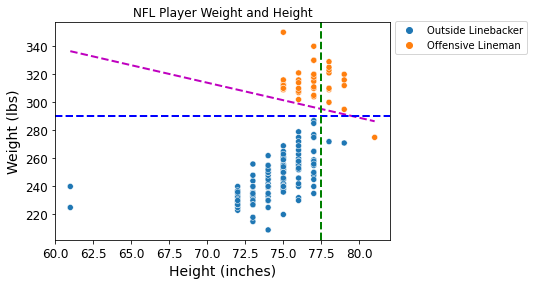

In [4]:
# Linear Decision Boundaries Attempts
# creates an array with 200 data points between the min and max height
x0 = np.linspace(df.Height_in.min(), df.Height_in.max(), 200) 
pred_1 = -2.5*x0 + 489 # creates a line from x0 data.

# plot three different potential decision boundaries (1d hyperplane)
plt.plot(x0, pred_1, "m--", linewidth=2)
plt.axhline(y=290, c='b', linestyle='--', linewidth=2)
plt.axvline(x=77.5, c='g', linestyle='--', linewidth=2)

# plot actual nfl player data
sns.scatterplot(x='Height_in',y='Weight_lbs', data=df, hue='Position Title')
plt.xlabel("Height (inches)")
plt.ylabel("Weight (lbs)")
plt.title('NFL Player Weight and Height')
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.93))
plt.show()

<div style="font-size:16px; border:1px solid black; padding:10px">
<center><h2><br><font color="blue">Comments</font></h2></center>
    <ul>
        <li>There are umpteen number of decision boundaries that could be used to separate the data, but some of the decision boundaries are more effective at separating the data into accurate groups.</li><br>
        <li>The number of potential decision boundaries that can be used to perfectly classify (separate) data is limited, and the distance between the two groups affects how well the decision boundary and SVM will classify new data.</li><br> 
    </ul>
</div>

<hr style="border-top: 5px solid black;">

<div id="objective3" style="font-size:16px; border:1px solid black; padding:10px">
<center><h1><br><font color="blue">Demonstrate how to carry out Hard Margin Classification.</font></h1></center>
    <ul><strong>Background Information:</strong>
        <li><mark>Hard margin classification is a linear SVM method that imposes that all instaces for each class be off to each side of the decision boundary. In otherwords, there is no flexibility, data from each class must be in their respective area.</mark></li><br>
            <li>The Hard Margin method minimizes the expression <strong>&#189;w<sup style="vertical-align: sup; font-size: smaller;">T</sup>w</strong>, because this is equal to <strong>&#189;*&#x2016;w&#x2016;</strong>, which is differentiable. Optimization algorithms work better when a function is differentiable.</li><br>
        <li>Support vectors are the data points that are closer to the hyperplane and influence the position, orientation and margin size of the hyperplane.</li><br>
        <li>The support vectors are used to maximize the margin of the classifier.</li><br>
        <li>Removing support vectors will change the position of the hyperplane.</li><br>        
        <li>The problem with the Hard Margin Classification method is that in the real world, the dataset is rarely perfectly separable, as illustrated in <a href="#objective2b">NFL Player Weight and Height Scatter Plot</a>.</li><br>
        <li>Often, data from one class is located within the margins of the hyperplane, or on the side of the opposite class.  This is not perfectly separable data.</li><br>
        <li>The other issue is that if the data is perfectly separable, the margin (distance between the two groups) is narrow, making it difficult to generalize well to new data.</li><br>
    </ul>
    <hr>
    <ul><strong>Steps to conduct Hard Margin Linear SVM Classification using Python Sklearn:</strong>
        <li>Set up <code>X</code> and <code>y</code> data array inputs for SVM classifier:
            <ul>
                <li><code>X</code> are the (independent variables) features we want to use to train the model. In this example, it is the height and weight of NFL players.  The data is a 2d numpy array.</li><br>
                <li>The <code>y</code> array is the dependent variable that we want to predict. We call this the target feature, and in this post, is the player position <code>['Offensive Lineman', 'Outside Linebacker']</code>.</li><br>
            </ul>
        </li><br>
        <li>Instantiate the <a href="https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html">SVM((*, C=1.0, kernel='rbf', degree=3, gamma='scale', coef0=0.0, shrinking=True, probability=False, tol=0.001, cache_size=200, class_weight=None, verbose=False, max_iter=- 1, decision_function_shape='ovr', break_ties=False, random_state=None)) clasifier</a>:
            <ul><strong>Parameters Explained:</strong>
                <li><code>kernel{‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’}, default=’rbf’</code>: Specifies the kernel type to be used in the algorithm. It must be one of ‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’ or a callable. If none is given, ‘rbf’ will be used. If a callable is given it is used to pre-compute the kernel matrix from data matrices; that matrix should be an array of shape (n_samples, n_samples).</li><br>
                <li><code>kernel="linear"</code>: is used in this example because we will conduct a linear SVM and we are also going to carry out a hard margin classification.</li><br>
                <li><code>C: float, default=1.0</code>: This is a regularization parameter. The strength of the regularization is inversely proportional to C. Must be strictly positive. The penalty is a squared l2 penalty. The larger the C value, the less the model will allow data points to misclassify and/or violate the margin (decision boundaries/hyperplane).</li><br>
                <li><code>C=float("inf")</code>: force the separation of the classes. This is the step in this example that will give us a <em>Hard margin classification</em>.</li><br>                
            </ul>
        </li><br> 
        <li><strong>Fit the model</strong>:
            <ul>
                <li><code>fit(X, y, sample_weight=None)</code>: Fit the SVM model according to the given training data.</li><br>
                <li><code>X{array-like, sparse matrix}</code>: of shape (n_samples, n_features) or (n_samples, n_samples).  In our example, X is a 2D numpy array. This is critical, otherwise you will get errors trying to fit the data.</li><br>
                <li><code>y array-like of shape (n_samples,)</code>: target values (class labels in classification, real numbers in regression). In our example, it is a 1-D array that contains <code>[0,1]</code> values. These values represent the classifications. <code>['Offensive Lineman' = 1, 'Outside Linebacker' = 0]</code></li><br>
                <li><code>svm_clf.fit(X, y)</code>: this is the code we used to fit our data</li><br>
        </ul>
    </ul>
</div>

<h2>SVM Classification</h2>

In [5]:
# Prepare parameters for SVM Linear Hard Margin Classification
X = df[['Height_in','Weight_lbs']].to_numpy()  # converts to 2d numpy array
y = df.target.to_numpy()

# SVM Classifier model
svm_clf = SVC(kernel="linear", C=float("inf"))
svm_clf.fit(X, y)

SVC(C=inf, kernel='linear')

<h2>Visualize Decision Boundaries and Support Vectors</h2>

<ul>
    <li>To help illustrate SVM Hard Margin Classification, the following code will visualize the decision boundary.</li><br>
    <li>The first step is to create a function that will plot the optimal hyperplane (decision boundary) and highlight the support vectors (data points that are important in the decision boundary).</li><br>
    <li>The function takes in three parameters:
        <ol>
            <li><code>svm_clf</code>: This is the SVM classifier that is already instantiated.</li>
            <li><code>xmin</code>: The minimal X value, which is the smallest NFL player height in this example.</li>
            <li><code>xmax</code>: The maximum X value, which is the tallest NFL player height in this example.</li>
        </ol>
            </li><br>
    <li><code>w = svm_clf.coef_[0]</code>: uses the <code>coef_ndarray of shape (n_classes * (n_classes - 1) / 2, n_features)</code> attribute.  This attribute contains the weights assigned to the features (coefficients in the primal problem). <em>This is only available in the case of a linear kernel</em>.</li>
    <li><code>b = svm_clf.intercept_[0]</code>: uses the <code>intercept_ndarray of shape (n_classes * (n_classes - 1) / 2,)</code> attribute.  This attribute contains Constants in decision function.</li>
    <li><code> x0 = np.linspace(xmin, xmax, 200)</code>: uses numpy linspace() to create an array of 200 values between the min and max x values (height). This will be used to calculate the decision boundary.</li>
    <li><code>decision_boundary = -w[0]/w[1] * x0 - b/w[1]</code>: The decision boundary is the product of each value between the height of NFL players and the ratio of the weights for each class. This is then subtracted by the bias (intercept) that is divided by the coefficient (weight) for the first class.</li>
    <li><code>margin = 1/w[1]</code>: saves the margin which is 1 divided by the coefficient for the class 1.</li>
    <li><code>gutter_up = decision_boundary + margin</code>: calculates the portion of the hyperplane.</li>
    <li><code>gutter_down = decision_boundary - margin</code>: calculates the portion of the hyperplane.</li>
    <li><code>svs = svm_clf.support_vectors_</code>: uses the <code>support_ndarray of shape (n_SV)</code> attribute to return the indices of support vectors that this method stores.  Not all Linear SVM methods provide the support vector indices.</li>
    <li><code>plt.scatter(svs[:, 0], svs[:, 1], s=180, facecolors='#FFAAAA')</code>: creates scatter plot of support vectors and gives them a size and color.</li>
    <li><code>plt.plot(x0, decision_boundary, "k-", linewidth=2)</code>: plots the decision boundary in black line.</li>
    <li><code>plt.plot(x0, gutter_up, "k--", linewidth=2</code>: Plots the upper (margin) boundary of the hyperplane.</li>
    <li><code>plt.plot(x0, gutter_down, "k--", linewidth=2)</code>: Plots the lower (margin) boundary of the hyperplane.</li>
 </ul>

In [6]:
# This function will plot the decision boundary and the support vectors
def plot_svc_decision_boundary(svm_clf, xmin, xmax):
    w = svm_clf.coef_[0]
    b = svm_clf.intercept_[0]

    # At the decision boundary, w0*x0 + w1*x1 + b = 0
    # => x1 = -w0/w1 * x0 - b/w1
    x0 = np.linspace(xmin, xmax, 200)
    decision_boundary = -w[0]/w[1] * x0 - b/w[1]

    margin = 1/w[1]
    gutter_up = decision_boundary + margin
    gutter_down = decision_boundary - margin

    svs = svm_clf.support_vectors_
    plt.scatter(svs[:, 0], svs[:, 1], s=180, facecolors='#FFAAAA')
    plt.plot(x0, decision_boundary, "k-", linewidth=2)
    plt.plot(x0, gutter_up, "k--", linewidth=2)
    plt.plot(x0, gutter_down, "k--", linewidth=2)

<h2>Code to actually plot the data, decision boundaries, and support vectors<h2>

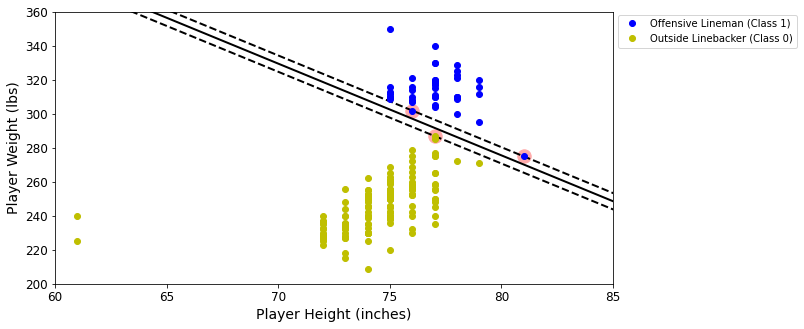

In [7]:
fig, axes = plt.subplots(ncols=1, figsize=(10,5))
plot_svc_decision_boundary(svm_clf, X.min(), X.max())
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bo", label="Offensive Lineman (Class 1)")
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", label="Outside Linebacker (Class 0)")
plt.xlabel("Player Height (inches)", fontsize=14)
plt.ylabel("Player Weight (lbs)", fontsize=14)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.93))

plt.axis([60, 85, 200, 360])
plt.show()

<div style="font-size:16px; border:1px solid black; padding:10px">
<center><h2><br><font color="blue">Comments</font></h2></center>
    <ul>
        <li>The data is perfectly separated by class.</li><br>
        <li>The support vectors are highlighted in red.</li><br>
        <li>The margin (the area between the dashed lines) is very narrow. If new data is introduced, the model cannot guarantee that the data will continue to be perfectly separated.</li><br>
        <li>The small margin is partly due to SVMs' sensitivity to the scales of the feature. The next method will demonstrate how to use feature scaling via <code>StandardScaler</code>. This will help improve the widest margin between classes.</li><br> 
    </ul>
</div>

<div id="objective4" style="font-size:16px; border:1px solid black; padding:10px">
<center><h1><br><font color="blue">Demonstrate how to carry out SVM Hard Margin Classification with Feature Scaling.</font></h1></center>
    <ul><strong>Background Information:</strong>
        <li><mark>SVM are sensitive to feature scales.</mark></li><br>
        <li>Python Sklearn provides methods to scale features so that the margin is maximized (improved).</li><br>
    </ul>
    <hr>
    <ul><strong>Steps to conduct Hard Margin Linear SVM Classification with feature scaling:</strong>
        <li>Import <code>from sklearn.preprocessing import StandardScaler</code> dependency
            <ul>
                <li><a href="https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html">StandardScaler Documentation</a></li>
                <li>This method will standardize features by removing the mean and scaling to unit variance <code>z = (x - u) / s</code>.</li>
            </ul>
        </li><br>
        <li>Instantiate StandardScaler class <code>scaler = StandardScaler()</code><li>
        <li><code>X_scaled = scaler.fit_transform(X)</code>: is a method used to fit the data and then returns the transform the data. The data <code>X</code> must be an array-like of shape (n_samples, n_features). In our case, it is a 2D numpy array.</li><br>
        <li><code>svm_clf = SVC(kernel="linear", C=float("inf"))</code> instantiates our SVM hard margin model and <code>svm_clf.fit(X_scaled, y)</code> fits the SVM model according to the given training data. In this case we pass in the scaled X data.</li><br>
        <li>The remaining code will plot the data, the decision boundary, the margins, and the support vectors.</li>
    </ul>
</div>

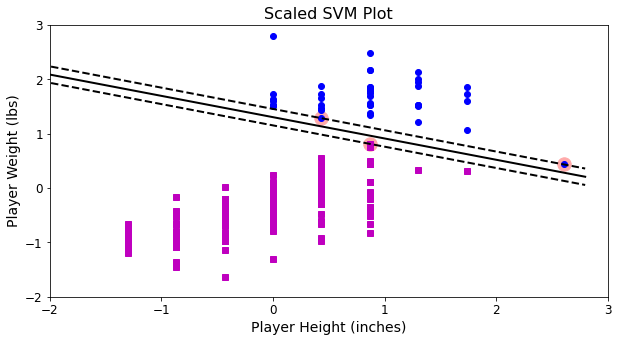

In [8]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
svm_clf = SVC(kernel="linear", C=float("inf"))
svm_clf.fit(X_scaled, y)

# plots data
fig, axes = plt.subplots(ncols=1, figsize=(10,5))
plt.plot(X_scaled[:, 0][y==1], X_scaled[:, 1][y==1], "bo", label="Offensive Lineman (Class 1)")
plt.plot(X_scaled[:, 0][y==0], X_scaled[:, 1][y==0], "ms", label="Outside Linebacker (Class 0)")
plot_svc_decision_boundary(svm_clf, X_scaled.min(), X_scaled.max())
plt.xlabel("Player Height (inches)", fontsize=14)
plt.ylabel("Player Weight (lbs)", fontsize=14)
plt.title("Scaled SVM Plot", fontsize=16)
plt.axis([-2, 3, -2, 3])
plt.show()

<div style="font-size:16px; border:1px solid black; padding:10px">
<center><h2><br><font color="blue">Comments</font></h2></center>
    <ul>
        <li>The data is perfectly separated by class.</li><br>
        <li>The support vectors are highlighted in red.</li><br>
        <li>The margin (the area between the dashed lines) has been expanded, and the scales for both features are between closer in range.</li>
    </ul>
</div>

<hr style="border-top: 5px solid black;">

<div id="objective5" style="font-size:16px; border:1px solid black; padding:10px">
<center><h1><br><font color="blue">Demonstrate how to carry out SVM Soft Margin Classification.</font></h1></center>
    <ul><strong>Background Information:</strong>
        <li><mark>Soft Margin Classification is a linear SVM classification method that is more flexible than Hard Margin Classificaiton by maximizing the margin between classes while limiting the margin violations (instances in the dataset that fall within the margins or are misclassified).</mark></li><br>
        <li>Soft Margin Classification generalizes better than Hard Margin Classification, and is more commonly used as most real datasets cannot be perfectly separated.</li><br>
        <li>An important hyperparamter of Soft Margin Classification is the <code>C</code> regularization parameter.</li><br>
        <li>The larger the C value, the more rigid the model, the smaller the C value, the more tolerant the model is to misclassifications and margin violations. Ergo, Soft Margin Classification.</li><br>
        <li>The hard margin classification set the <code>C</code> regularization parameter to a very large number (inf).</li><br>
        <li>Soft margin classification also relies on hinge loss function</li><br>
        <li>The loss function used in SVM is the <mark>hinge loss</mark>.</li><br>
        <li>Hings loss is a function whose value is non-zero until it reaches a certain point "z", and after that point, the hinge loss value is equal to zero.</li><br>
        <li>The loss term is in the loss function is the c hyperparameter and the zeta term.</li><br>
        <li>If the loss function is less than 1, then the point is misclassified, and contributes to the loss.</li><br>
        <li>If the loss function is equal to or greater than 1, then the point is correctly classified and does not contributes to the loss.</li><br>
    </ul>
    <hr>
    <ul><strong>Steps to conduct Soft Margin Linear SVM Classification with feature scaling and hinge loss:</strong>
        <li>Import <code>from sklearn.pipeline import Pipeline</code> dependency
            <ul>
                <li><a href="https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html">Pipeline Documentation</a></li>
                <li>The purpose of the pipeline is to assemble several steps that can be cross-validated together while setting different parameters. It makes it easier to code.</li>
            </ul>
        </li><br>
        <li>Import <code>from sklearn.svm import LinearSVC</code> dependency
            <ul>
                <li><a href="https://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVC.html">LinearSVC Documentation</a></li>
                <li>Similar to SVC with parameter kernel=’linear’, but implemented in terms of liblinear rather than libsvm, so it has more flexibility in the choice of penalties and loss functions and should scale better to large numbers of samples. We are using this instead of <code>SVC(kernel="linear", C=float("inf"))</code></li>
                <li>This method does not provide the support vector indices we have been extracting using the attributes for our plotting purposes.</li>
            </ul>
        </li><br>        
        <li>Prepare input data <code>X and y</code> as previously described in this post.</li><br>
        <li><code>svm_clf = Pipeline([("scaler", StandardScaler()),("linear_svc", LinearSVC(C=1, loss="hinge", random_state=42)),])</code>:
            <ul>
                <li><code>svm_clf = Pipeline([])</code>: The pipeline method will carry out several transformations and save the data to the variable <em>svm_clf</em>.</li><br>
                <li><code>("scaler", StandardScaler())</code>: this will instantiate the StandardScaler() method that will carry out our feature scaling.</li><br>
                <li><code>("linear_svc", LinearSVC(C=1, loss="hinge", random_state=42))</code>: this is the new code. We are using the <em>LinearSVC() classification class.</em></li><br>
                <li><code>class sklearn.svm.LinearSVC(penalty='l2', loss='squared_hinge', *, dual=True, tol=0.0001, C=1.0, multi_class='ovr', fit_intercept=True, intercept_scaling=1, class_weight=None, verbose=0, random_state=None, max_iter=1000)</code> explained:
                    <ul>
                        <li><code>C, default=1.0</code>: Regularization parameter. The strength of the regularization is inversely proportional to C. Must be strictly positive.</li><br>
                        <li><code>loss{‘hinge’, ‘squared_hinge’}, default=’squared_hinge’</code>: Specifies the loss function. ‘hinge’ is the standard SVM loss (used e.g. by the SVC class) while ‘squared_hinge’ is the square of the hinge loss. The combination of penalty='l1' and loss='hinge' is not supported. In our example, we are using the hinge loss function.</li><br>
                        <li><code>random_state</code>: Controls the pseudo random number generation for shuffling the data for the dual coordinate descent (if dual=True). When dual=False the underlying implementation of LinearSVC is not random and random_state has no effect on the results. Pass an int for reproducible output across multiple function calls. We are using the integer 42.</li><br>
                        <li><code>max_iterint, default=1000</code>: The maximum number of iterations to be run. In some cases you need to run more than the default.</li><br>                      
                    </ul>
                </li><br>
            </ul>
        </li>
        <li><code>svm_clf.fit(X, y)</code>: Fits our data to the model we just instantiated</li>
    </ul>
</div>

In [9]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

In [10]:
# Input data
X = df[['Height_in','Weight_lbs']].to_numpy()
y = df.target.to_numpy()

svm_clf = Pipeline([
        ("scaler", StandardScaler()),
        ("linear_svc", LinearSVC(C=1, loss="hinge", random_state=42)),
    ])

svm_clf.fit(X, y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('linear_svc', LinearSVC(C=1, loss='hinge', random_state=42))])

<h2>Test data with new intances</h2>

In [11]:
# Outside Linebacker test
test1= svm_clf.predict([[80, 320]])

# Offensive Lineman test
test2= svm_clf.predict([[70, 280]])

print(f'test1: {test1}\ntest2: {test2}')

test1: [1]
test2: [0]


<div style="font-size:16px; border:1px solid black; padding:10px">
<center><h2><br><font color="blue">Comments</font></h2></center>
    <ul>
        <li>The results from the test data confirms that the model is accurately classifying.</li><br>
        <li>The C regularization parameter in this example was left at default, in the following example we will see how modulating the C value affects the size of the margin, and the introduction to misclassifications and margin violations.</li><br>
    </ul>
</div>

<div id="objective6" style="font-size:16px; border:1px solid black; padding:10px">
    <center><h1><br><font color="blue">Demonstrate how the Regularization Term <code>C</code> affects the Margin Size in SVM Soft Margin Classification.</font></h1></center>
    <ol><strong>Steps:</strong>
        <li>Two models will be trained, one will have the defaul C value (1), and the second will have a larger regularization term (100).</li>
        <li>The data is visualized to compare the margin size, margin violations, and misclassifications.</li>
    </ol>
</div>

In [12]:
# Step 1
X = df[['Height_in','Weight_lbs']].to_numpy()
y = df.target.to_numpy()

scaler = StandardScaler()
svm_clf1 = LinearSVC(C=1, loss="hinge", random_state=42, max_iter = 5000)
svm_clf2 = LinearSVC(C=100, loss="hinge", random_state=42, max_iter = 5000)

scaled_svm_clf1 = Pipeline([
        ("scaler", scaler),
        ("linear_svc", svm_clf1),
    ])
scaled_svm_clf2 = Pipeline([
        ("scaler", scaler),
        ("linear_svc", svm_clf2),
    ])

scaled_svm_clf1.fit(X, y)
scaled_svm_clf2.fit(X, y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('linear_svc',
                 LinearSVC(C=100, loss='hinge', max_iter=5000,
                           random_state=42))])

<h2>Prepare data for visualization</h2>

 - The data needs to be unscaled again so that we can properly plot this data
 - LinearSVC() does not provide an attribute to obtain the support vectors, so the code below is intended to obtain these support vectors and margins
 - Essentially, we are calculating the bias term (b) y intercepts and the coefficients (weights) of the features
 - We convert 
 - <code>decision_function(X)</code>: predict confidence scores for samples and is an attribute of LinearSVC class
 - <code>svm_clf.coef_</code>: returns the weights assigned to the features (coefficients in the primal problem). This is only available in the case of a linear kernel and is an attribute of the LinearSVC class
 - <code>svm_clf.intercept_</code>: returns Constants in decision function and is an attribute of the LinearSVC class 
 - <code>scaler.mean_</code>: returns the mean value for each feature in the training set and is an attribute of the StandardScaler class
 - <code>scaler.scale_</code>: returns the feature relative scaling of the data that is used to achieve zero mean and unit variance. Generally this is calculated using np.sqrt(var_). If a variance is zero, we can’t achieve unit variance, and the data is left as-is, giving a scaling factor of 1. scale_ is equal to None when with_std=False.

In [13]:
# Convert to unscaled parameters
b1 = svm_clf1.decision_function([-scaler.mean_ / scaler.scale_])
b2 = svm_clf2.decision_function([-scaler.mean_ / scaler.scale_])
w1 = svm_clf1.coef_[0] / scaler.scale_
w2 = svm_clf2.coef_[0] / scaler.scale_

svm_clf1.intercept_ = np.array([b1])
svm_clf2.intercept_ = np.array([b2])
svm_clf1.coef_ = np.array([w1])
svm_clf2.coef_ = np.array([w2])

# Find support vectors (LinearSVC does not do this automatically)
t = y * 2 - 1
support_vectors_idx1 = (t * (X.dot(w1) + b1) < 1).ravel()
support_vectors_idx2 = (t * (X.dot(w2) + b2) < 1).ravel()
svm_clf1.support_vectors_ = X[support_vectors_idx1]
svm_clf2.support_vectors_ = X[support_vectors_idx2]

<h2>Plot Data</h2>

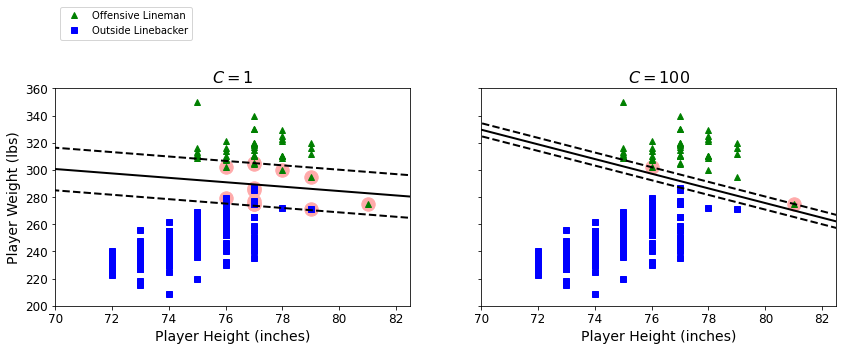

In [14]:
fig, axes = plt.subplots(ncols=2, figsize=(14,4), sharey=True)

plt.sca(axes[0])
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "g^", label="Offensive Lineman")
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bs", label="Outside Linebacker")
plot_svc_decision_boundary(svm_clf1, X.min(), X.max())
plt.xlabel("Player Height (inches)", fontsize=14)
plt.ylabel("Player Weight (lbs)", fontsize=14)
plt.legend(loc='center left', bbox_to_anchor=(0, 1.3))
plt.title("$C = {}$".format(svm_clf1.C), fontsize=16)
plt.axis([70, 82.5, 200, 360])

plt.sca(axes[1])
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "g^")
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bs")
plot_svc_decision_boundary(svm_clf2, X.min(), X.max())
plt.xlabel("Player Height (inches)", fontsize=14)
plt.title("$C = {}$".format(svm_clf2.C), fontsize=16)
plt.axis([70, 82.5, 200, 360])
plt.show()

<div style="font-size:16px; border:1px solid black; padding:10px">
<center><h2><br><font color="blue">Comments</font></h2></center>
    <ul>
        <li>The plot on the left where C = 1 shows that the margin is larger than in the right plot where C = 100, although there are several data points within the margin.</li><br>
        <li>There are no margin violations in the plot where C=100, which makes sense since as C increases, the flexibility of the model reduces, and the margin also decreases between both classes.</li><br>
    </ul>
</div>

<hr style="border-top: 5px solid black;">

<div style="font-size:16px; border:1px solid black; padding:10px">
<center><h2><br><font color="blue">Final Thoughts</font></h2></center>
    <ul>
        <li>SVM is a powerful machine learning model that can be used in supervised classification problems.</li><br>
        <li>In this post, I demonstrate how to use either soft or hard margin SVM classification using Python Sklearn.</li><br>
        <li>I also dicussed the importance of feature scaling, and the hyperparameters that play an essential role in implementing SVM.</li><br>
        <li>The data in this example was linearly separable. This is not always the case. To handdle this problem, SVM uses kernels, which help transform nonlinear data, into a linear dataset that can then be used in SVM classification. This will be the subject of another post. Thanks for reading!</li><br>        
    </ul>
</div>